In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("../data/cleaned_spacex_data.csv")
df.head()


,name,date_utc,success,rocket,launchpad,flight_number
0,FalconSat,2006-03-24T22:30:00.000Z,0,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,1
1,DemoSat,2007-03-21T01:10:00.000Z,0,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,2
2,Trailblazer,2008-08-03T03:34:00.000Z,0,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,3
3,RatSat,2008-09-28T23:15:00.000Z,1,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,4
4,RazakSat,2009-07-13T03:35:00.000Z,1,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,5


In [3]:
# Convert rocket and launchpad to numeric using LabelEncoder
le_rocket = LabelEncoder()
le_launchpad = LabelEncoder()

df['rocket'] = le_rocket.fit_transform(df['rocket'])
df['launchpad'] = le_launchpad.fit_transform(df['launchpad'])

X = df[['rocket', 'launchpad', 'flight_number']]
y = df['success']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_log))


Logistic Regression Accuracy: 0.9024390243902439


In [6]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 1.0


In [7]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[ 4  0]
 [ 0 37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        37

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



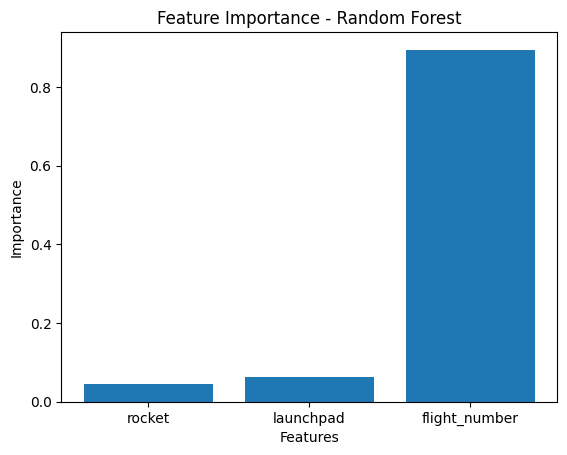

In [8]:
import matplotlib.pyplot as plt

feature_importance = rf_model.feature_importances_
features = X.columns

plt.bar(features, feature_importance)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [9]:
import joblib

joblib.dump(rf_model, "../models/random_forest_model.pkl")


['../models/random_forest_model.pkl']